In [1]:
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib
import random
import os
import argparse
from sklearn.metrics import precision_recall_curve

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

snps=pd.read_csv("/mnt/lab_data/kundaje/users/anusri/QTLs/bQTLs/src/pu1.txt",header=0,sep='\t')
dnase_preds="/mnt/lab_data2/anusri/variant-scorer/src/output/bqtls_lcl/pu1/DNASE/summary.mean.variant_scores_new.tsv"
atac_preds="/mnt/lab_data2/anusri/variant-scorer/src/output/bqtls_lcl/pu1/ATAC/summary.mean.variant_scores_new.tsv"
#atac_preds="/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/ATAC_PE/GM12878/subsampling/GM12878_250M/bqtls_pu1_preds/snp_scores.tsv"


In [2]:
snps.head()
snps['rsid'] = snps["Chr"].astype(str) + "_" + snps["position"].astype(str) + "_" + snps["POSTallele"].astype(str) + "_" + snps["ALTallele"].astype(str)

In [17]:
bqtls_dnase = pd.read_csv(dnase_preds,sep="\t", header=0, index_col=False)
bqtls_atac = pd.read_csv(atac_preds,sep="\t", header=0, index_col=False)


In [18]:
bqtls_dnase = bqtls_dnase.merge(snps, on=["rsid"])
bqtls_dnase['logratio']=np.log2((bqtls_dnase['prechipfreq'].astype(float)+.01)/(bqtls_dnase['POSTfreq'].astype(float)+0.01))
bqtls_dnase.shape

(999799, 34)

In [19]:
bqtls_atac = bqtls_atac.merge(snps, on=["rsid"])
bqtls_atac['logratio']=np.log2((bqtls_atac['prechipfreq'].astype(float)+.01)/(bqtls_atac['POSTfreq'].astype(float)+0.01))
bqtls_atac.shape

(999799, 34)

In [20]:
bqtls_dnase['pvalue'] = bqtls_dnase['pvalue'].astype(float)
bqtls_atac['pvalue'] = bqtls_atac['pvalue'].astype(float)


In [21]:
sum(bqtls_atac['pvalue']<1e-7)

1041

In [22]:
sum(bqtls_atac['pvalue']>0.05)

905400

In [3]:
bqtls_atac.head()

NameError: name 'bqtls_atac' is not defined

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

def get_auprc(bqtls_df, bqtls_df_dnase):
    bqtls_df_sig = bqtls_df[bqtls_df['pvalue']<1e-9].reset_index()
    bqtls_df_sig["label"]=1
    bqtls_df_nsig = bqtls_df[bqtls_df['pvalue']>0.1].reset_index()
    bqtls_df_nsig["label"]=0
    bqtls_df_nsig = bqtls_df_nsig.sample(bqtls_df_sig.shape[0]*50)
    
    alldf = pd.concat([bqtls_df_sig,bqtls_df_nsig])
    keyd="abs_logfc_x_jsd_x_max_percentile.mean"
    #keyd="Beta"
    fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(alldf["label"].astype(int), abs(alldf[keyd]))
    roc_auc = metrics.average_precision_score(alldf["label"], abs(alldf[keyd]))
    plt.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='blue', linestyle='dashed', label="ChromBPNet w/ ATAC, AP="+str(round(roc_auc,2)))
    print(roc_auc)
    
    bqtls_df_sig = bqtls_df_dnase[bqtls_df_dnase['pvalue']<1e-9].reset_index()
    bqtls_df_sig["label"]=1
    bqtls_df_nsig = bqtls_df_dnase[bqtls_df_dnase['pvalue']>0.1].reset_index()
    bqtls_df_nsig["label"]=0
    bqtls_df_nsig = bqtls_df_nsig.sample(bqtls_df_sig.shape[0]*50)
    
    alldf = pd.concat([bqtls_df_sig,bqtls_df_nsig])
    keyd="abs_logfc_x_jsd_x_max_percentile.mean"
    #keyd="Beta"
    fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(alldf["label"].astype(int), abs(alldf[keyd]))
    roc_auc = metrics.average_precision_score(alldf["label"], abs(alldf[keyd]))
    plt.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='red', linestyle='dashed', label="ChromBPNet w/ DNase, AP="+str(round(roc_auc,2)))
    print(roc_auc)
    
    alldf = pd.concat([bqtls_df_sig,bqtls_df_nsig])
    index = np.arange(len(alldf["label"]))
    np.random.shuffle(index)

    keyd="abs_logfc_x_jsd_x_max_percentile.mean"
    #keyd="Beta"
    
    shuff = abs(alldf[keyd].to_numpy())[np.array(index)]
    fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(alldf["label"].astype(int), shuff)
    roc_auc = metrics.average_precision_score(alldf["label"], shuff)
    plt.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='green', linestyle='dashed', label="Random AP="+str(round(roc_auc,2)))
    print(roc_auc)
    
    plt.legend()

0.44686949839204126
0.43470330000193674
0.019821494216998248


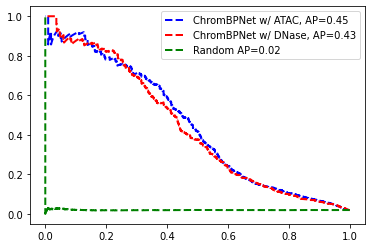

In [25]:
get_auprc(bqtls_atac, bqtls_dnase)

In [26]:
bqtls_atac.columns

Index(['chr', 'pos', 'allele1', 'allele2', 'rsid', 'logfc.mean',
       'abs_logfc.mean', 'abs_logfc.mean.pval', 'jsd.mean', 'jsd.mean.pval',
       'logfc_x_jsd.mean', 'abs_logfc_x_jsd.mean', 'abs_logfc_x_jsd.mean.pval',
       'max_percentile.mean', 'max_percentile.mean.pval',
       'logfc_x_max_percentile.mean', 'abs_logfc_x_max_percentile.mean',
       'abs_logfc_x_max_percentile.mean.pval', 'jsd_x_max_percentile.mean',
       'jsd_x_max_percentile.mean.pval',
       'abs_logfc_x_jsd_x_max_percentile.mean',
       'abs_logfc_x_jsd_x_max_percentile.mean.pval',
       'logfc_x_jsd_x_max_percentile.mean', 'Chr', 'position', 'Depth',
       'ALTdepth', 'REFDepth', 'ALTallele', 'POSTallele', 'POSTfreq',
       'prechipfreq', 'pvalue', 'logratio'],
      dtype='object')

In [27]:

snps_atac = bqtls_atac[bqtls_atac['pvalue']<1e-9].drop_duplicates()
snps_atac["output_sign_result_1"] = np.sign(snps_atac["logfc.mean"])*snps_atac["jsd.mean"]

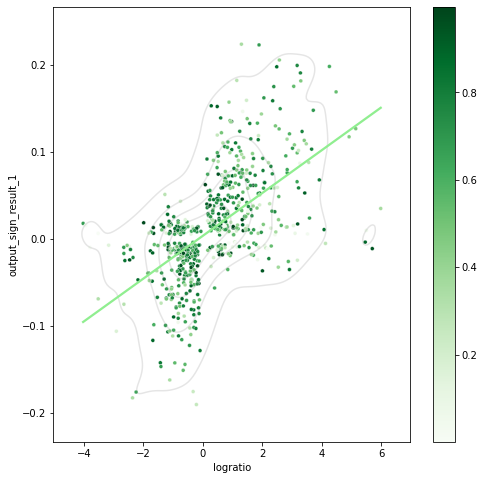

In [28]:
import seaborn as sns
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

plt.figure(figsize=(8,8))


sns.kdeplot(
    data=snps_atac,
    x="logratio",
    y="output_sign_result_1",
    levels=5,
    fill=False,
    alpha=0.2,
    color="grey",
    cut=2,

)
ax = sns.scatterplot(x="logratio", y="output_sign_result_1", hue="max_percentile.mean", data=snps_atac, s=15, palette="Greens")
sns.regplot(x="logratio", y="output_sign_result_1", data=snps_atac, scatter=False, ci=None, color="#90EE90")
#sns.jointplot(x=data["Beta"], y=data["sd_sign.mean"],s=0,ax=ax)

norm = plt.Normalize(snps_atac['max_percentile.mean'].min(), snps_atac['max_percentile.mean'].max())
sm = plt.cm.ScalarMappable(cmap="Greens", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
ax.get_legend().remove()
ax.figure.colorbar(sm)

In [38]:
snps_atac.shape

(633, 35)

In [39]:
sum(bqtls_atac['pvalue']<1e-11)

437

In [29]:
import scipy.stats

In [30]:
scipy.stats.pearsonr(snps_atac["logratio"], snps_atac["output_sign_result_1"])

(0.575064669218782, 5.298554840966146e-57)